# Semester Project - Nextbike
## Task 1 - Exploration and Description

In [1]:
# import relevant libaries for data exploration 
from vincenty import vincenty
import numpy as np 
import pandas as pd 
import datetime
from datetime import timedelta


import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# reading the csv
df = pd.read_csv("../data/raw/dortmund.csv", index_col=0)
df.head(5)

,p_spot,p_place_type,datetime,b_number,trip,p_uid,p_bikes,p_lat,b_bike_type,p_name,p_number,p_lng,p_bike
0,True,0,2019-01-20 00:00:00,52073,first,7314560,1,51.506613,4,FH-Dortmund Sonnenstraße,7374,7.455587,False
1,True,0,2019-01-20 23:59:00,52073,last,7314560,1,51.506613,4,FH-Dortmund Sonnenstraße,7374,7.455587,False
2,True,0,2019-01-20 00:00:00,52331,first,113573,2,51.492690,4,Universität/S-Bahnhof,7362,7.417633,False
3,True,0,2019-01-20 23:59:00,52331,last,113573,4,51.492690,4,Universität/S-Bahnhof,7362,7.417633,False
4,True,0,2019-01-20 00:00:00,31346,first,113543,3,51.523351,4,Brackel Kirche,7337,7.546867,False


### What does the columns represent? 

The prefix "p" stands for the <i> positon </i> and the prefix "b" describes the features for the used <i> bike</i> . 

###### Meanings of the columns

| Column      | Description          |
|-------------|----------------------|
|<i> p_spot </i>      |True, if it is an official station                   |
|<i>p_place_type </i>|                      |
|<i>datetime </i></i>    |Datetime of the start or end of a trip |
|<i>b_number </i>    |Bike ID                   |
|<i>trip   </i>      |Values = ["first, last, start, end] <br> defines if a trip starts or ends|
|<i>p_uid </i>       |ID of the bike station / position                      |
|<i>p_bikes </i>     |Number of available bikes at the postion                      |
|<i>p_lat   </i>     |Latitude coordinate of the position                      |
|<i>b_bike_type</i>  |Type of the used bike                      |
|<i>p_name  </i>     |Street or station name of the current position                      |
|<i>p_number  </i>   |ID of the postion / bike station                      |
|<i>p_lng </i>       |Longitude coordinate of the position                      |
|<i>p_bike   </i>    |                      |



### Analyse the trip column

In [3]:
df["trip"].unique()

array(['first', 'last', 'start', 'end'], dtype=object)

There are four different values in the trip column [first, last, start, end]. 
At least two values are required to define whether the data set belongs to the starting point or the end of the trip. This means that one trip is represented in two rows in the dataframe. One of the rows contains the values at the startinging point (i.e. datetime, start position) and the other row contains the values at the ending point of the trip. 

###### Why are there four values in the trip column? 

Let's have a deeper look in the dataframe and the trip column.

In [4]:
# there are much more datasets which have the values "start" and "end" in the trip column
df["trip"].value_counts()

start    249536
end      242878
last      88710
first     88528
Name: trip, dtype: int64

In [5]:
df[(df["trip"] == "first") | (df["trip"] =="last")].head(50)

,p_spot,p_place_type,datetime,b_number,trip,p_uid,p_bikes,p_lat,b_bike_type,p_name,p_number,p_lng,p_bike
0,True,0,2019-01-20 00:00:00,52073,first,7314560,1,51.506613,4,FH-Dortmund Sonnenstraße,7374,7.455587,False
1,True,0,2019-01-20 23:59:00,52073,last,7314560,1,51.506613,4,FH-Dortmund Sonnenstraße,7374,7.455587,False
2,True,0,2019-01-20 00:00:00,52331,first,113573,2,51.492690,4,Universität/S-Bahnhof,7362,7.417633,False
3,True,0,2019-01-20 23:59:00,52331,last,113573,4,51.492690,4,Universität/S-Bahnhof,7362,7.417633,False
4,True,0,2019-01-20 00:00:00,31346,first,113543,3,51.523351,4,Brackel Kirche,7337,7.546867,False
5,True,0,2019-01-20 23:59:00,31346,last,113543,4,51.523351,4,Brackel Kirche,7337,7.546867,False
6,True,0,2019-01-20 00:00:00,50641,first,113561,5,51.506312,4,Hainallee / Südbad,7351,7.470531,False
9,True,0,2019-01-20 23:59:00,50641,last,6260019,1,51.493966,4,TU Dortmund Emil-Figge-Straße 50,7367,7.418008,False
10,True,0,2019-01-20 00:00:00,53801,first,50383,3,51.513777,14,Westentor,7319,7.455849,False
11,True,0,2019-01-20 03:39:00,53801,last,50383,3,51.513777,14,Westentor,7319,7.455849,False


In this filtered dataframe above it gets clear that the examples with the values **first** and **last** in the trip column don't make much sense. Most of the trips in this dataframe have an unlikely long trip duration. The start time of a trip is almost always at 0 AM and the end time of a trip is at 23:59 PM. 
Furthermore the start and the end positions of one trip are the same. 

It could be measurement errors or other data recording errors. <br> 
These datasets can be disregarded for the next steps, because they aren't suitable for further analyses. 

In [6]:
# focus on datasets whit values "start" and "end" in the trip column
# store the starting and ending events of a trip in two different dataframes
# p_number != 0 --> just focus on the trips to an official bike station 
df_start = df[(df["trip"] == "start") & (df["p_number"] != 0)]
df_end = df[(df["trip"] == "end") & (df["p_number"] != 0)]

In [7]:
df_start.reset_index(inplace=True)
df_end.reset_index(inplace=True)

In [8]:
# rename the column names to distinguish the columns after a merge of the dateframes
df_start.rename(columns={"index":"index_start","datetime":"datetime_start", "p_lat":"latitude_start","p_lng":"longitude_start","p_name":"p_name_start","b_number":"b_number_start"},inplace=True)
df_end.rename(columns={"index":"index_end","datetime":"datetime_end", "p_lat":"latitude_end","p_lng":"longitude_end","p_name":"p_name_end","b_number":"b_number_end"},inplace=True)

C:\Users\Emre\Anaconda3\envs\PDS20\lib\site-packages\pandas\core\frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [9]:
# drop the columns, which aren't necessary for the final dateframe
df_start.drop(['p_spot', 'p_place_type',  'trip',
       'p_uid', 'p_bikes', 'b_bike_type',
       'p_number', 'p_bike'],inplace=True,axis=1)

df_end.drop(['p_spot', 'p_place_type', 'trip',
       'p_uid', 'p_bikes', 'b_bike_type',
       'p_number', 'p_bike'],inplace=True,axis=1)

C:\Users\Emre\Anaconda3\envs\PDS20\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [10]:
# modify the index_end to merge the dataframes by index_start and index_end
df_end["index_end"] = df_end["index_end"]-1

C:\Users\Emre\Anaconda3\envs\PDS20\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [11]:
# merge the two sepearte dataframes to the final dataframe 
# the final dataframe consists of datasets which describe a trip with features for the start and the end of a trip
df_final = pd.merge(df_start,df_end,left_on="index_start", right_on="index_end")

In [12]:
# check if there is a trip with different bike numbers at the start and the end of the trip 
#- if so this wouldn't make sense 
df_final[df_final["b_number_start"] != df_final["b_number_start"]]

,index_start,datetime_start,b_number_start,latitude_start,p_name_start,longitude_start,index_end,datetime_end,b_number_end,latitude_end,p_name_end,longitude_end


In [13]:
# drop the redundant columns
df_final.drop(["index_start","index_end","b_number_end"],inplace=True,axis=1)
df_final.rename({"b_number_start":"b_number"},inplace=True)

In [14]:
# check for missing values 
df_final.isna().any(axis=0)

datetime_start     False
b_number_start     False
latitude_start     False
p_name_start       False
longitude_start    False
datetime_end       False
latitude_end       False
p_name_end         False
longitude_end      False
dtype: bool

In [15]:
# converting objects to datetimes
df_final["datetime_start"] = pd.to_datetime(df_final["datetime_start"])
df_final["datetime_end"] = pd.to_datetime(df_final["datetime_end"])

# adding the trip duration with the difference of start and end time
df_final["trip_duration"] = df_final["datetime_end"] -df_final["datetime_start"]

#converting timedelta to numeric and format in minutes 
df_final["trip_duration"] = pd.to_numeric(df_final["trip_duration"] / 60000000000)

# adding the distance between start and end position
df_final["distance"] = df_final.apply(
    lambda x: vincenty([x["latitude_start"], x["longitude_start"]],
                       [x["latitude_end"], x["longitude_end"]],),axis=1)

## adding the weekday of the start time of a trip; stored in integers (0: monday, 6:sunday)
df_final['weekday'] = df_final['datetime_start'].dt.dayofweek

In [16]:
# function which returns True for saturday and sunday; otherwise it returns False
def isWeekend(index_of_day): 
    if index_of_day > 4: 
        return True 
    else: 
        return False

# adding new boolean column "weekend"    
df_final["weekend"] = df_final["weekday"].apply(lambda x: isWeekend(x))

In [18]:
# transform column "datatime_start" into several columns 
df_final["day"] = df_final["datetime_start"].apply(lambda x: x.day)
df_final["month"] = df_final["datetime_start"].apply(lambda x: x.month)
df_final["hour"] = df_final["datetime_start"].apply(lambda x: x.hour)

In [19]:
df_final.to_csv('../data/processed/dortmund_trips.csv')
df_final

,datetime_start,b_number_start,latitude_start,p_name_start,longitude_start,datetime_end,latitude_end,p_name_end,longitude_end,trip_duration,distance,weekday,weekend,day,month,hour
0,2019-01-20 16:22:00,50641,51.506312,Hainallee / Südbad,7.470531,2019-01-20 17:00:00,51.493966,TU Dortmund Emil-Figge-Straße 50,7.418008,38,3.897290,6,True,20,1,16
1,2019-01-20 02:31:00,50425,51.517155,Hauptbahnhof/Bahnhofsvorplatz,7.459931,2019-01-20 02:43:00,51.513069,Unionstr.,7.448886,12,0.891383,6,True,20,1,2
2,2019-01-20 11:32:00,53006,51.509557,Ritterhausstr.,7.446949,2019-01-20 13:33:00,51.517155,Hauptbahnhof/Bahnhofsvorplatz,7.459931,121,1.235649,6,True,20,1,11
3,2019-01-20 14:38:00,53006,51.517155,Hauptbahnhof/Bahnhofsvorplatz,7.459931,2019-01-20 14:53:00,51.500725,Polizeipräsidium,7.459819,15,1.827997,6,True,20,1,14
4,2019-01-20 17:02:00,53006,51.500725,Polizeipräsidium,7.459819,2019-01-20 17:16:00,51.514029,Schwanenwall,7.472570,14,1.724677,6,True,20,1,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207471,2019-12-31 12:39:00,500019,51.500675,Kuithanstr.,7.440834,2019-12-31 12:54:00,51.517155,Hauptbahnhof/Bahnhofsvorplatz,7.459931,15,2.262708,1,False,31,12,12
207472,2019-12-31 19:28:00,500019,51.517155,Hauptbahnhof/Bahnhofsvorplatz,7.459931,2019-12-31 19:35:00,51.513069,Unionstr.,7.448886,7,0.891383,1,False,31,12,19
207473,2019-12-31 12:36:00,51287,51.482359,Barop Parkhaus,7.432326,2019-12-31 15:14:00,51.490505,An der Palmweide,7.438352,158,0.998294,1,False,31,12,12
207474,2019-12-31 22:37:00,500113,51.510976,Stadtgarten,7.464534,2019-12-31 23:05:00,51.486747,Am Beilstück,7.435750,28,3.355884,1,False,31,12,22


### Calculating aggregate statistic per month, per day of week and per hour of day

##### Statistic per month

In [20]:
df_final.groupby(['month']).mean()[["trip_duration"]]
# --> no data for July 

,trip_duration
month,
1,65.135989
2,35.401047
3,41.186327
4,44.510447
5,52.121733
6,42.560769
8,34.758468
9,20.710711
10,18.898973


In [21]:
# in this array "July" is missing 
month_by_name = np.array(["January", "February", "March", "April", "May", "June", "August", "September", "October", "November", "December"])

# Means 
df_final.groupby(['month']).mean()[["trip_duration"]].set_index(keys=month_by_name)

,trip_duration
January,65.135989
February,35.401047
March,41.186327
April,44.510447
May,52.121733
June,42.560769
August,34.758468
September,20.710711
October,18.898973
November,25.229027


In [22]:
# Standard deviation 
df_final.groupby(['month']).std()[["trip_duration"]].set_index(keys=month_by_name)

,trip_duration
January,131.724449
February,94.228610
March,98.509464
April,99.339453
May,110.840998
June,96.293009
August,79.853703
September,53.338906
October,48.727480
November,66.714969


#### Statistics per day of week

In [23]:
# Means 
weekday_by_name= np.array(["Monday", "Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"])
df_final.groupby(['weekday']).mean()[["trip_duration"]].set_index(weekday_by_name)

,trip_duration
Monday,30.053161
Tuesday,36.014902
Wednesday,33.014809
Thursday,31.970065
Friday,33.902980
Saturday,37.342071
Sunday,32.080302


In [24]:
# Standard deviation 
df_final[["weekday", "trip_duration"]].groupby("weekday").std().set_index(weekday_by_name)

,trip_duration
Monday,73.128124
Tuesday,86.036889
Wednesday,81.896887
Thursday,80.431986
Friday,80.763024
Saturday,94.889149
Sunday,90.431240


#### Statistics per hour of day

In [25]:
# Means 
df_final.groupby(['hour']).mean()[["trip_duration"]]

,trip_duration
hour,
0,58.854846
1,55.360782
2,33.281008
3,23.742657
4,54.533423
5,65.690177
6,58.079338
7,57.050767
8,45.014704


In [26]:
# Standard deviation 
df_final[["hour", "trip_duration"]].groupby("hour").std()

,trip_duration
hour,
0,166.089569
1,145.765061
2,122.470896
3,90.472204
4,148.854879
5,135.961196
6,125.960485
7,118.082078
8,97.729403


In [27]:
df_final.head()

,datetime_start,b_number_start,latitude_start,p_name_start,longitude_start,datetime_end,latitude_end,p_name_end,longitude_end,trip_duration,distance,weekday,weekend,day,month,hour
0,2019-01-20 16:22:00,50641,51.506312,Hainallee / Südbad,7.470531,2019-01-20 17:00:00,51.493966,TU Dortmund Emil-Figge-Straße 50,7.418008,38,3.897290,6,True,20,1,16
1,2019-01-20 02:31:00,50425,51.517155,Hauptbahnhof/Bahnhofsvorplatz,7.459931,2019-01-20 02:43:00,51.513069,Unionstr.,7.448886,12,0.891383,6,True,20,1,2
2,2019-01-20 11:32:00,53006,51.509557,Ritterhausstr.,7.446949,2019-01-20 13:33:00,51.517155,Hauptbahnhof/Bahnhofsvorplatz,7.459931,121,1.235649,6,True,20,1,11
3,2019-01-20 14:38:00,53006,51.517155,Hauptbahnhof/Bahnhofsvorplatz,7.459931,2019-01-20 14:53:00,51.500725,Polizeipräsidium,7.459819,15,1.827997,6,True,20,1,14
4,2019-01-20 17:02:00,53006,51.500725,Polizeipräsidium,7.459819,2019-01-20 17:16:00,51.514029,Schwanenwall,7.472570,14,1.724677,6,True,20,1,17


### Visualization of the trip distribution

#### Trip Duration

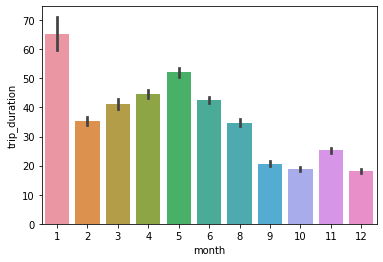

In [30]:
trips = df_final
sns.barplot(x="month", y="trip_duration", data=trips, estimator=np.mean)
plt.show()

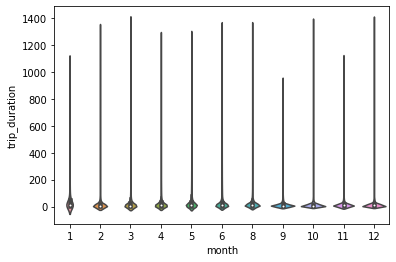

In [32]:
sns.violinplot(x="month", y="trip_duration", data=trips)
plt.show()

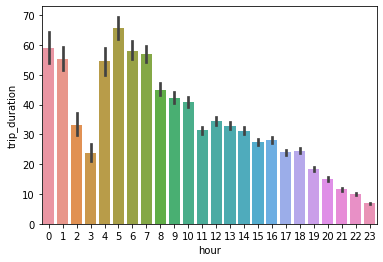

In [33]:
sns.barplot(x="hour", y="trip_duration", data=trips, estimator=np.mean)
plt.show()
# 0 bis 2 Uhr?

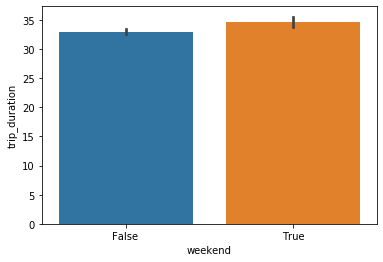

In [34]:
sns.barplot(x="weekend", y="trip_duration", data=trips, estimator=np.mean)
plt.show()

#### Trip Distance

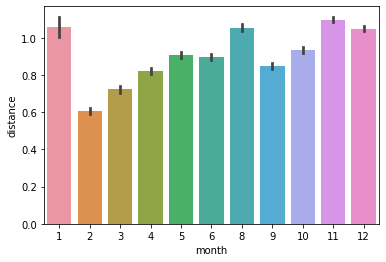

In [35]:
sns.barplot(x="month", y="distance", data=trips, estimator=np.mean)
plt.show()

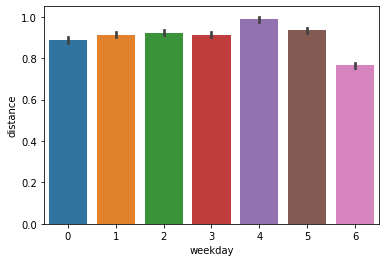

In [36]:
sns.barplot(x="weekday", y="distance", data=trips, estimator=np.mean)
plt.show()

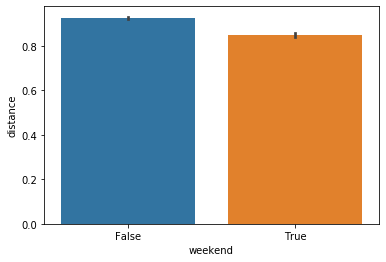

In [37]:
sns.barplot(x="weekend", y="distance", data=trips, estimator=np.mean)
plt.show()

#### Amount of trips

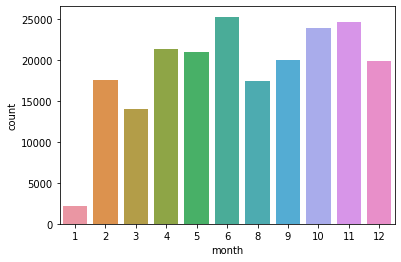

In [38]:
sns.countplot(x="month", data=trips)
plt.show()
# take out january?

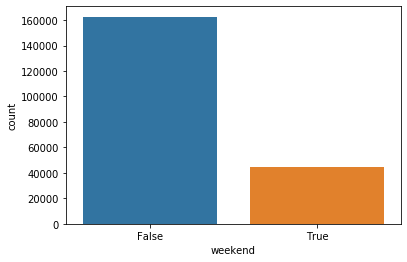

In [39]:
sns.countplot(x="weekend", data=trips)
plt.show()

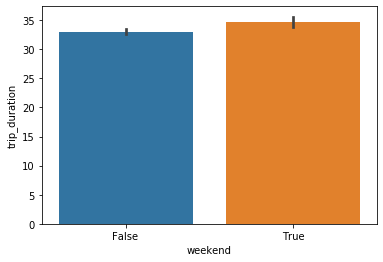

In [40]:
sns.barplot(x="weekend", y="trip_duration", data=trips, estimator=np.mean)
plt.show()

In [ ]:
df_final.mean()[["distance"]]
# --> no data for July 

In [ ]:
df_final.groupby(['month']).mean()[["distance"]]
# --> no data for July 